# Data preprocessing on Loans dataset

- Below contains certain data acquisition and preprocessing operations before ingesting the data into ML model

## 1. Importing Libraries

In [ ]:
# 'os' module provides functions for interacting with the operating system
import os

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Pandas' is used for data manipulation and analysis
import pandas as pd

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
from matplotlib import pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")


## 2. Importing data and exploration of it

### Data Acquisition - Reading the Loans CSV files as Pandas Dataframe

In [ ]:
# loading the data and setting the unique client_id as the index:
df = pd.read_csv('./data/loans.csv', index_col = 'client_id')

In [6]:
# showing the first 5 rows of the dataset:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


### Exploration of the data

In [7]:
# To check the Dimensions of the dataset:
df.shape

(443, 7)

In [8]:
# Checking the info of the data:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB


In [9]:
# Checking the datatypes of the columns
df.dtypes

loan_type       object
loan_amount      int64
repaid           int64
loan_id          int64
loan_start      object
loan_end        object
rate           float64
dtype: object

#### Converting data types of certain columns to proper meaningful data types based on their feature

- Column 'loan_id' can be of object type instead integer format
- Column 'repaid' can be of categorical type as it consists of binary values which are interpreted as yes or no
- Columns 'loan_start' and 'loan_end' should be date type instead of object type

In [10]:
# data type conversion for column -> loan_id:
df['loan_id'] = df['loan_id'].astype('object')

# data type conversion for column -> repaid:
df['repaid'] = df['repaid'].astype('category')

In [11]:
# data type conversion for columns -> loan_start and loan_end:
df['loan_start'] = pd.to_datetime(df['loan_start'], format = '%Y-%m-%d')
df['loan_end'] = pd.to_datetime(df['loan_end'], format = '%Y-%m-%d')

In [12]:
# verifying whether the new data types have been updated or not
df.dtypes

loan_type              object
loan_amount             int64
repaid               category
loan_id                object
loan_start     datetime64[ns]
loan_end       datetime64[ns]
rate                  float64
dtype: object

In [18]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


As you can see in the above two output fields, values of the data in the table remains the same here, but only the data types of these columns changes.

#### Getting statistics summary of the data

In [15]:
# Statistics summary for Numerical column data:
df.describe()

,loan_amount,rate
count,443.000000,443.000000
mean,7982.311512,3.217156
std,4172.891992,2.397168
min,559.000000,0.010000
25%,4232.500000,1.220000
50%,8320.000000,2.780000
75%,11739.000000,4.750000
max,14971.000000,12.620000


In [16]:
# Statistics summary for Categorical data:
df.describe(exclude=[np.number])

,loan_type,repaid,loan_id,loan_start,loan_end
count,443,443.0,443.0,443,443
unique,4,2.0,443.0,430,428
top,home,1.0,10239.0,2006-01-19 00:00:00,2004-05-16 00:00:00
freq,121,237.0,1.0,2,2
first,NaN,NaN,NaN,2000-01-26 00:00:00,2001-08-02 00:00:00
last,NaN,NaN,NaN,2014-11-11 00:00:00,2017-05-07 00:00:00


## 3. Missing Values detection and treatment

### Detection of Missing Values

In [17]:
# check for missing values
df.isnull().sum()

loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64

There are no missing values in the data.

### Treatment of missing values

Missing values in the data are handled in two ways:
- Deletion of such records
- Data Imputation -> substituting missing data with a different value(like mean value or most frequent value or constant value).

    Sk-learn library has an in-built function called Iterative Imputer to impute the missing values. Its sklearn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html
  Pandas has interpolate() method which replaces all the NaN values to interpolate(median) value of that column

## 4. Outliers detection and treatment

### Detection of Outliers

Box plots are one of the best way to identify outliers in the data fields.
These are plotted for the most important numerical data columns of our data.

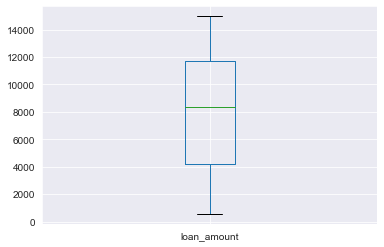

In [19]:
# Box plot for column -> loan_amount
df['loan_amount'].plot(kind='box')
plt.show()

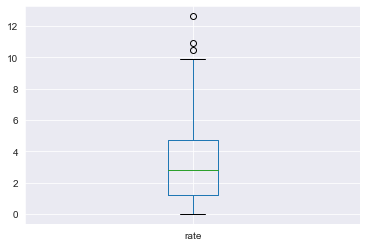

In [20]:
# Box plot for column -> rate
df['rate'].plot(kind='box')
plt.show()

We can see that there are no outliers in the 'loan_amount' column and some outliers are present in the 'rate' column.

### Treatment of Outliers:

To treat for outliers can either cap the values or transform the data.


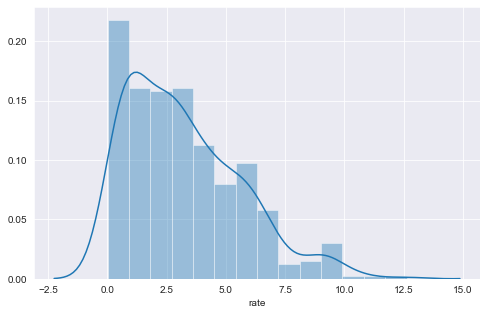

In [28]:
# plotting the distribution of rate column values
plt.figure(figsize=(8,5))
sns.distplot(df['rate'])
plt.show()

Based on the above histogram plot, we see that the rate column values are positively skewed and may contain outliers so, we can use transformation techniques like log transformation to move this skewed data closer to the normal distribution.

#### I. Transformation Approach:
##### a. SQRT Transformation:
Here, we will convert the all the values of column 'rate' into their respective square root values and store it into new column 'sqrt_rate'

In [21]:
# storing sqrt values of rate column's values in a new column
# df['sqrt_rate'] = df['rate']**0.5
df['sqrt_rate'] = np.sqrt(df['rate'])

In [22]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,sqrt_rate
client_id,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181


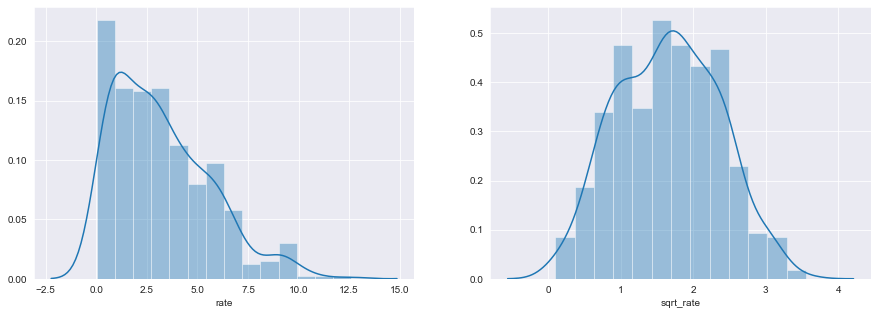

In [24]:
# plotting the distribution

fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.distplot(df['rate'], ax=axes[0])            # distplot() generates histogram plots of a list values
sns.distplot(df['sqrt_rate'], ax=axes[1])

plt.show()

As we can see here, after performing sqrt transformation on the rate column data we are able to remove its skewness and get the data as nearly normal distribution format.

Below calculating the skewness and kurtosis to statistically verify that the data is normally distributed and is useful for further analysis or not.

<b>NOTE:
- skewness within -0.5 to 0.5 indicates that data has normal distribution
- kurtosis within range -2 to 2 indicates a good normal distribution and lesser outliers presence</b>

In [32]:
# checking the skewness, kurtosis between the original and transformed data:
print("The skewness of the original data is {}".format(df.rate.skew()))
print('The skewness of the SQRT transformed data is {}'.format(df.sqrt_rate.skew()))

print('')

print("The kurtosis of the original data is {}".format(df.rate.kurt()))
print("The kurtosis of the SQRT transformed data is {}".format(df.sqrt_rate.kurt()))

The skewness of the original data is 0.884204614329943
The skewness of the SQRT transformed data is 0.04964154055528862

The kurtosis of the original data is 0.4243716514373652
The kurtosis of the SQRT transformed data is -0.6318437642052039


##### Inference of SQRT Transformation:
- The Rate column was right skewed earlier.
- The transformed SQRT rate, on the right graph resembles normal distribution now.
- The skewness and kurtosis have reduced significantly for the transformed SQRT column.

##### b. Log Transformation:

Here, we will convert the all the values of column 'rate' into their respective logarithmic values and store it into new column 'log_rate'

In [37]:
# storing logarithmic values of rate column's values in a new column
df['log_rate'] = np.log(df['rate'])

## Using Lambda function :
# df['log_rate'] = df['rate'].apply(lambda x:np.log(x))

In [38]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,sqrt_rate,log_rate
client_id,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,0.765468
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,0.223144
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,-0.385662
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,0.215111
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.141033


In [40]:
# skewness and kurtosis value of the original and transformed data:
print("The skewness of the original data is {}".format(df.rate.skew()))
print('The skewness of the SQRT transformed data is {}'.format(df.sqrt_rate.skew()))
print("The skewnss of the LOG transformed data is {}".format(df['log_rate'].skew()))

print('')

print("The kurtosis of the original data is {}".format(df.rate.kurt()))
print("The kurtosis of the SQRT transformed data is {}".format(df.sqrt_rate.kurt()))
print("The kurtosis of the LOG transformed data is {}".format(df['log_rate'].kurt()))

The skewness of the original data is 0.884204614329943
The skewness of the SQRT transformed data is 0.04964154055528862
The skewnss of the LOG transformed data is -1.5943217626331552

The kurtosis of the original data is 0.4243716514373652
The kurtosis of the SQRT transformed data is -0.6318437642052039
The kurtosis of the LOG transformed data is 4.157026150198228


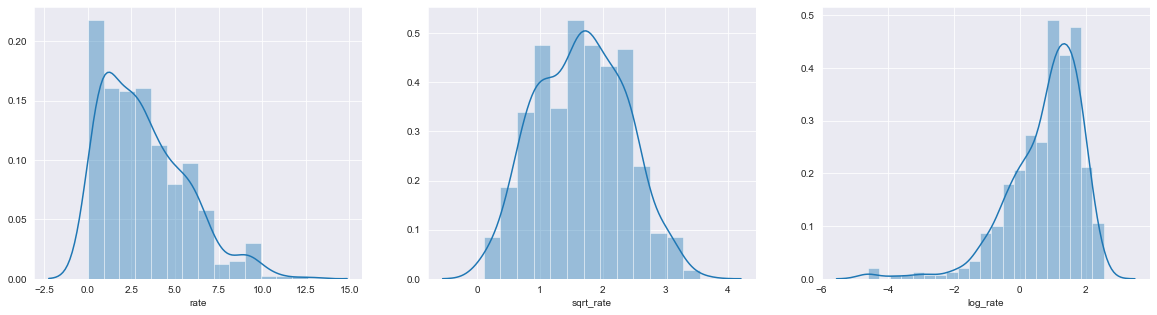

In [41]:
# plot the distributions of the original column and its transformed columns all together:
fig, axes = plt.subplots(1,3,figsize=(20,5))

sns.distplot(df['rate'], ax=axes[0])
sns.distplot(df['sqrt_rate'], ax=axes[1])
sns.distplot(df['log_rate'], ax=axes[2])

plt.show()

##### Inference of Log Transformation:

- Here, Log Transformation made the rate left skewed and more peaked.
- In this case, Log Transformation heavily manipulates the data.
- So here, square root transformation seems more suitable

##### Other Transformation Techniques:
Below mentioned techniques are used to transform non-normal dependant variables into a normal shape
- Box-Cox Transformation: Can be used be used on positive values only
- Yeo-Johnson Transformation: Can be used on both positive and negative values

There are inbuilt functions in Sci-kit Learn library called PowerTransformer for both of these transformations. Its sklearn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.power_transform.html
</br>
Can also refer -> https://medium.com/@patricklcavins/using-scipys-powertransformer-3e2b792fd712

#### II. Capping Approach:
##### a. Z-Score approach to treat outliers:
All the values above 3 standard deviation and below -3 standard deviation are outliers and can be removed.

In [43]:
# loading the dataset and setting client id as index
df1 = pd.read_csv('./data/loans.csv', index_col = 'client_id')
df1.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [44]:
# modifying the data types again
# loan_id:
df1['loan_id'] = df1['loan_id'].astype('object')

# repaid:
df1['repaid'] = df1['repaid'].astype('category')

# loan_start:
df1['loan_start'] = pd.to_datetime(df1['loan_start'], format = '%Y-%m-%d')

# loan_end:
df1['loan_end'] = pd.to_datetime(df1['loan_end'], format = '%Y-%m-%d')

In [45]:
# 'SciPy' is used to perform scientific computations
import scipy.stats as stats

In [46]:
# Creating new column field with Z-score of each record:
df1['ZR'] = stats.zscore(df1['rate'])
df1.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,ZR
client_id,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.445677
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.821544
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.059594
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.825721
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.036399


In [47]:
# Combined Lower limit and Upper limit and acquiring the records which are outliers:
df1[(df1['ZR']<-3) | (df1['ZR']>3)]

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,ZR
client_id,,,,,,,,
41480,credit,2947,1,10302,2005-11-10,2008-03-16,10.49,3.037362
48177,other,6318,0,10224,2003-02-02,2005-05-08,10.89,3.204415
49624,home,8133,1,10312,2009-03-14,2011-03-21,12.62,3.926916


In [48]:
# count of outliers:
df1[(df1['ZR']<-3) | (df1['ZR']>3)].shape[0]

3

In [49]:
# Cleaned Data: without outliers so z>-3 and z< +3
df2= df1[(df1['ZR']>-3) & (df1['ZR']<3)].reset_index()
df2.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,ZR
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.445677
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.821544
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.059594
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.825721
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.036399


In [50]:
print("Dimensions of original data: ", df1.shape)
print("Dimensions of data after outliers removal: ", df2.shape)

Dimensions of original data:  (443, 8)
Dimensions of data after outliers removal:  (440, 9)


##### Interpretation of Z-Score outlier removal approach:
- A crude way to know whether the outliers have been removed or not is to check the dimensions of the data.
- From the above output, we can see that the dimensions are reduced that implies outliers are removed.

In [60]:
# removal of the unwanted Z-score results column
df3 = df2.copy()

df3.drop(columns = ['ZR'], inplace=True)
df3.set_index('client_id', inplace=True)
df3.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


<hr>

##### b. IQR Method to treat Outliers:

All the values below (Q1 - 1.5 x IQR) and values above (Q3 + 1.5 x IQR) are outliers and can be removed.

In [61]:
# finding the Quantiles:
Q1 = df3.rate.quantile(0.25)
Q2 = df3.rate.quantile(0.50)
Q3 = df3.rate.quantile(0.75)

# IQR : Inter-Quartile Range
IQR = Q3 - Q1

# Lower Limit:
LC = Q1 - (1.5*IQR)

# Upper Limit:
UC = Q3 + (1.5*IQR)

display(LC)
display(UC)

-3.9762499999999994

9.87375

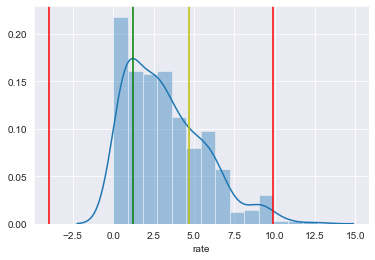

In [63]:
# Plotting the rate column distribution
sns.distplot(df1.rate)
plt.axvline(UC, color='r')
plt.axvline(LC, color ='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='y')
plt.show()

In [67]:
# Find Outliers wrt IQR
df1[(df1.rate<LC) | (df1.rate>UC)]

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,ZR
client_id,,,,,,,,
41480,credit,2947,1,10302,2005-11-10,2008-03-16,10.49,3.037362
39505,cash,11647,1,11928,2003-07-28,2005-12-24,9.91,2.795137
48177,other,6318,0,10224,2003-02-02,2005-05-08,10.89,3.204415
49624,home,8133,1,10312,2009-03-14,2011-03-21,12.62,3.926916


In [68]:
# Count of outliers wrt IQR
df1[(df1.rate<LC) | (df1.rate>UC)].shape[0]

4

In [69]:
# Store the clean data wrt IQR:
df4 = df3[(df3.rate>LC) & (df3.rate<UC)]
df4.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [73]:
print("Dimensions of original data: ", df1.shape)
print("Dimensions of data after outliers removal wrt IQR: ", df4.shape)

Dimensions of original data:  (443, 8)
Dimensions of data after outliers removal wrt IQR:  (439, 7)


##### Interpretation of IQR outlier removal approach:
- A crude way to know whether the outliers have been removed or not is to check the dimensions of the data.
- From the above output, we can see that the dimensions are reduced that implies outliers are removed.

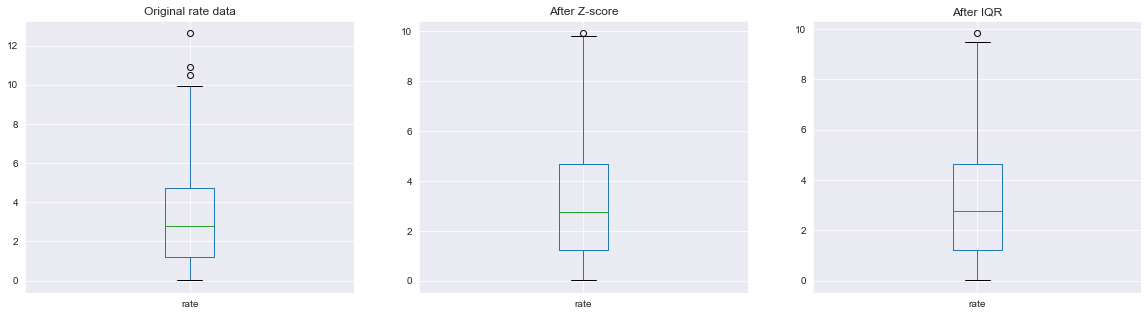

In [75]:
# Box plots for all the approaches
fig, axes = plt.subplots(1,3,figsize=(20,5))

df1['rate'].plot(kind='box', ax=axes[0])
axes[0].set_title('Original rate data')
df3['rate'].plot(kind='box', ax=axes[1])
axes[1].set_title('After Z-score')
df4['rate'].plot(kind='box', ax=axes[2])
axes[2].set_title('After IQR')

plt.show()

## 5. Scaling the Numerical Features:
The need for Scaling is :
- Comparison between variables is easier
- Computation power is more efficient and less time consuming.


There are two ways to scale the data:
- Standardization (Z-Score)
- Normalization: Min Max Scalar

Both can be done manually as well as have in-built functions in sklearn.

##### Note: With Scaling all three - Skewness, Kurtosis and distribution remain same so there is no impact on outliers as well.

### a. Standardization (Z-Score)

Scales the data using the formula: <b> (x-mean)/standard deviation </b>

In [76]:
# Creating new column fields with Z-score of each record:
df3['ZR'] = stats.zscore(df3['rate'])
df3['ZLA'] = stats.zscore(df3['loan_amount'])
df3.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,ZR,ZLA
client_id,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.438905,1.359338
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.829306,0.430405
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.076560,1.134650
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.833644,1.082909
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.013802,1.449644


In [77]:
# skewness and kurtosis value of the original and scaled data:
print("The skewness of the original rate column data is {}".format(df3.rate.skew()))
print('The skewness of the Z-score scaled rate column data is {}'.format(df3.ZR.skew()))
print("The skewness of the original loan_amount column data is {}".format(df3.loan_amount.skew()))
print("The skewnss of the Z-score scaled loan_amount column data is {}".format(df3.ZLA.skew()))

print('')

print("The kurtosis of the original rate column data is {}".format(df3.rate.kurt()))
print('The kurtosis of the Z-score scaled rate column data is {}'.format(df3.ZR.kurt()))
print("The kurtosis of the original loan_amount column data is {}".format(df3.loan_amount.kurt()))
print("The kurtosis of the Z-score scaled loan_amount column data is {}".format(df3.ZLA.kurt()))

The skewness of the original rate column data is 0.7594062707815686
The skewness of the Z-score scaled rate column data is 0.7594062707815691
The skewness of the original loan_amount column data is -0.04678765472024289
The skewnss of the Z-score scaled loan_amount column data is -0.0467876547202429

The kurtosis of the original rate column data is -0.05964248048746912
The kurtosis of the Z-score scaled rate column data is -0.05964248048746823
The kurtosis of the original loan_amount column data is -1.2354309429278456
The kurtosis of the Z-score scaled loan_amount column data is -1.2354309429278458


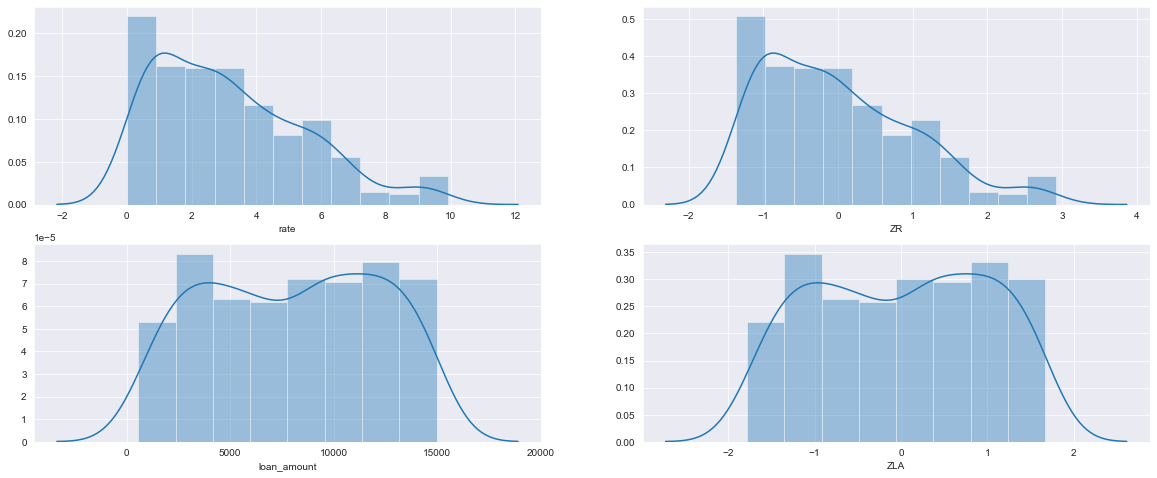

In [85]:
# Distribution of the columns

fig, axes = plt.subplots(2,2, figsize=(20,8))

sns.distplot(df3['rate'], ax=axes[0,0])
sns.distplot(df3['ZR'], ax=axes[0,1])
sns.distplot(df3['loan_amount'], ax=axes[1,0])
sns.distplot(df3['ZLA'], ax=axes[1,1])


plt.show()

The only difference between the two curves is of the Range on the x-axis.

### b. Normalization: Min Max Scalar
Scales the data using the formula: <b> (x - min)/(max - min) </b>

In [86]:
# import required built in package
from sklearn.preprocessing import MinMaxScaler

In [89]:
df4 = df3.copy()

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df4[['rate', 'loan_amount']])

print(len(normalized_data))

440


In [99]:
df4['MM_R'] = normalized_data[:, 0]
df4['MM_LA'] = normalized_data[:, 1]

In [100]:
df4.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,ZR,ZLA,MM_R,MM_LA
client_id,,,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.438905,1.359338,0.216162,0.909867
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.829306,0.430405,0.125253,0.640785
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.076560,1.134650,0.067677,0.844782
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.833644,1.082909,0.124242,0.829795
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.013802,1.449644,0.315152,0.936026


In [101]:
# skewness and kurtosis value of the original and scaled data:
print("The skewness of the original rate column data is {}".format(df4.rate.skew()))
print('The skewness of the normalised rate column data is {}'.format(df4.MM_R.skew()))
print("The skewness of the original loan_amount column data is {}".format(df4.loan_amount.skew()))
print("The skewness of the normalised loan_amount column data is {}".format(df4.MM_LA.skew()))

print('')

print("The kurtosis of the original rate column data is {}".format(df4.rate.kurt()))
print('The kurtosis of the normalised rate column data is {}'.format(df4.MM_R.kurt()))
print("The kurtosis of the original loan_amount column data is {}".format(df4.loan_amount.kurt()))
print("The kurtosis of the normalised loan_amount column data is {}".format(df4.MM_LA.kurt()))

The skewness of the original rate column data is 0.7594062707815686
The skewness of the normalised rate column data is 0.7594062707815684
The skewness of the original loan_amount column data is -0.04678765472024289
The skewness of the normalised loan_amount column data is -0.046787654720243106

The kurtosis of the original rate column data is -0.05964248048746912
The kurtosis of the normalised rate column data is -0.05964248048746823
The kurtosis of the original loan_amount column data is -1.2354309429278456
The kurtosis of the normalised loan_amount column data is -1.2354309429278456


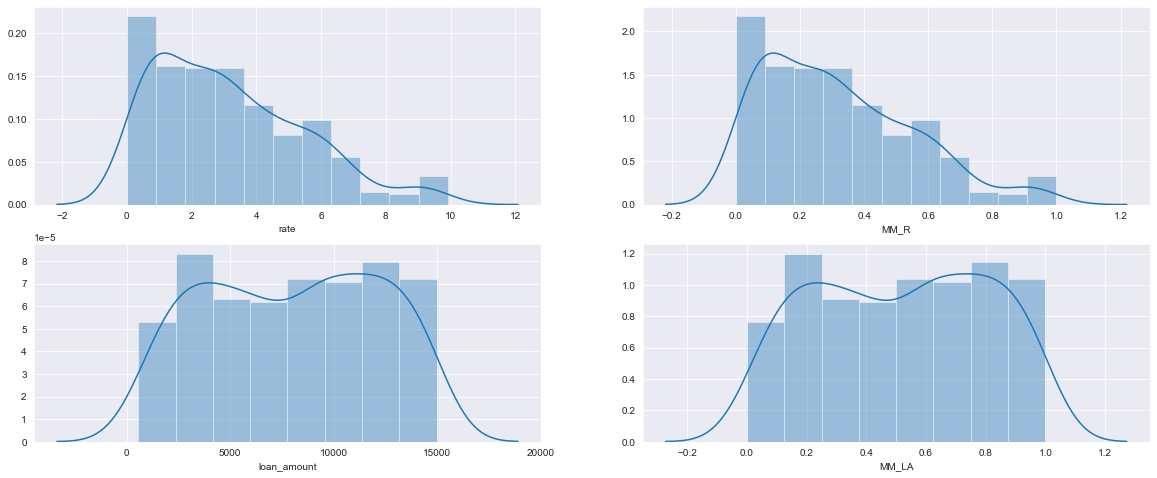

In [102]:
# Distribution of the columns

fig, axes = plt.subplots(2,2, figsize=(20,8))

sns.distplot(df4['rate'], ax=axes[0,0])
sns.distplot(df4['MM_R'], ax=axes[0,1])
sns.distplot(df4['loan_amount'], ax=axes[1,0])
sns.distplot(df4['MM_LA'], ax=axes[1,1])

plt.show()

## 6. Encoding the Categorical Features

There are two ways to encode the categorical data into dummyvariables. Using:
- pd.get_dummies
- sklearn's in-built function of OneHotEncoder and LabelEncoder

In [104]:
# Loans data:
df_loans = df3.copy()
df_loans.drop(columns=['ZR', 'ZLA'], inplace=True)
df_loans.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [105]:
df_loans.dtypes

loan_type              object
loan_amount             int64
repaid               category
loan_id                object
loan_start     datetime64[ns]
loan_end       datetime64[ns]
rate                  float64
dtype: object

In [106]:
# Repaid is also a categoriy columns and creating dummies for loan_type
df_loans.repaid.head()

client_id
46109    0
46109    0
46109    1
46109    1
46109    1
Name: repaid, dtype: category
Categories (2, int64): [0, 1]

#### a) pd.get_dummies approach

In [108]:
dummy_cat = pd.get_dummies(df_loans['loan_type'], drop_first = True)
dummy_cat.head(20)

# drop_first = True drops the first column for each feature

,credit,home,other
client_id,,,
46109,0,1,0
46109,1,0,0
46109,0,1,0
46109,0,0,0
46109,1,0,0
46109,0,1,0
46109,0,0,0
46109,0,1,0
46109,0,1,0


#### b) One Hot Encoding

In [109]:
from sklearn.preprocessing import OneHotEncoder

In [110]:
OE_tips = OneHotEncoder(drop ='first').fit(df_loans[['loan_type']])
OE_tips.categories_

[array(['cash', 'credit', 'home', 'other'], dtype=object)]

#### c) Label Encoding

In [113]:
from sklearn.preprocessing import LabelEncoder

In [114]:
LE = LabelEncoder()
LE_tips = LE.fit(df_loans[['loan_type']])

In [115]:
LE_tips.classes_

array(['cash', 'credit', 'home', 'other'], dtype=object)

In [116]:
# transform any new values to Dummy variables via Label Encoder
LE_tips.transform(['other', 'cash', 'home', 'credit'])

array([3, 0, 2, 1], dtype=int64)

In [117]:
# Inverse transform to get original values from the dummy variables:
LE_tips.inverse_transform([1,2,3,0])

array(['credit', 'home', 'other', 'cash'], dtype=object)

## 7. Creating new Derived features
We can use the loan_start and loan_end features to calculate the tenure of the loan

In [118]:
# import datetime as dt

In [119]:
df_loans['loan_tenure'] =  df_loans['loan_end'] - df_loans['loan_start']
df_loans.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loan_tenure
client_id,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,613 days
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,635 days
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,519 days
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,879 days
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,684 days


In [120]:
df_loans.dtypes

loan_type               object
loan_amount              int64
repaid                category
loan_id                 object
loan_start      datetime64[ns]
loan_end        datetime64[ns]
rate                   float64
loan_tenure    timedelta64[ns]
dtype: object

The number of days in the tenure are currently in TimeDelta, we want it integer hence will do the conversion as follows:

In [121]:
df_loans['loan_tenure'] = df_loans['loan_tenure'].dt.days
df_loans['loan_tenure']

client_id
46109    613
46109    635
46109    519
46109    879
46109    684
        ... 
26945    928
26945    511
26945    948
26945    633
26945    638
Name: loan_tenure, Length: 440, dtype: int64

In [122]:
# Tenure in number of Years:
df_loans['loan_tenure'] = df_loans['loan_tenure']/365
df_loans['loan_tenure']

client_id
46109    1.679452
46109    1.739726
46109    1.421918
46109    2.408219
46109    1.873973
           ...   
26945    2.542466
26945    1.400000
26945    2.597260
26945    1.734247
26945    1.747945
Name: loan_tenure, Length: 440, dtype: float64

## 8. Split into Training and Testing Data

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
# Splitting for X and Y variables:
Y = df_loans['loan_amount']
X = df_loans.drop('loan_amount', axis=1)

In [125]:
# Independent Variable
X.head()

,loan_type,repaid,loan_id,loan_start,loan_end,rate,loan_tenure
client_id,,,,,,,
46109,home,0,10243,2002-04-16,2003-12-20,2.15,1.679452
46109,credit,0,10984,2003-10-21,2005-07-17,1.25,1.739726
46109,home,1,10990,2006-02-01,2007-07-05,0.68,1.421918
46109,cash,1,10596,2010-12-08,2013-05-05,1.24,2.408219
46109,credit,1,11415,2010-07-07,2012-05-21,3.13,1.873973


In [126]:
# Dependent or Target Variable
Y.head()

client_id
46109    13672
46109     9794
46109    12734
46109    12518
46109    14049
Name: loan_amount, dtype: int64

In [127]:
## Splitting dataset into 80% Training and 20% Testing Data:

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8, random_state =0)

# random_state ---> is seed -- fixing the sample selection for Training & Testing dataset

# check the dimensions of the train & test subset for

print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is:", X_test.shape)

print('')
print("The shape of Y_train is:", Y_train.shape)
print("The shape of Y_test is:", Y_test.shape)

The shape of X_train is: (352, 7)
The shape of X_test is: (88, 7)

The shape of Y_train is: (352,)
The shape of Y_test is: (88,)


To statistically test if the train and test representative of the overall data, would compute the Median for the independent variables for both the test and train sets.

In [128]:
# median for y_train
median_y_train = Y_train.median()

# median for y_test
median_y_test = Y_test.median()

In [129]:
print('The median for Y Train variables is:',median_y_train)
print('The median for Y Test variables is:',median_y_test)

The median for Y Train variables is: 8412.5
The median for Y Test variables is: 7673.0


## Conclusion:

Based on the above result, we can conclude statistically that the train and test representative of the overall data as the median for both y_train and y_test are similar.